<img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/>

# <center> Hackwagon Academy: DS101 In-Class Practice Week 6</center>
## <center>Exploratory Data Analysis - Lazada Case Study</center>
## Learning Objectives

1. Recap
2. Understand how to read a large dataset
3. Process behind doing data exploration
3. Data inspection
4. The need for exploratory data analysis
5. Basic data visualisation

<b><i>A table of important collections functions is on the last part of this notebook for your use</b></i>

##  Exploratory Data Analysis

In any Data Science project, the first step is to perform <b>Exploratory Data Analysis</b> (EDA) on the dataset. EDA is the first step for us to begin understanding the dataset and in doing so, answer some of the common assumptions we have of our data so that we are able to understand how to better prepare it for further analysis.

We will be doing the following steps in our EDA:

1. Read File
2. Preview Data
3. Clean Data
4. Explore with Questions
5. Visualise

## Lazada Dataset
<img src="https://s.yimg.com/ny/api/res/1.2/_qLpCqbdgKq0nnY3UDmI2w--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9NzQ0O2g9Mzcy/http://media.zenfs.com/en/homerun/feed_manager_auto_publish_494/87db61c8ea6d6fcc4122595bb0c0c2c5" width="400">

This dataset has been source from the Lazada marketplace, where we have above <b>36 thousand rows</b> of data to work with. <b>Each row represents one product</b>. Opening this file in Microsoft Excel would look like this:

<img src="https://i.imgur.com/E0QJP92.png">

We're going to do some simple analysis with these products and see what we can come up with.

<h2>Step 1: Reading the Lazada Dataset </h2>

### Question 1
Read the `lazada_data.csv` file in to a list of dictionaries and store them in to a variable called `lazada_data`.

In [4]:
# Your code here:

import csv

with open('lazada_data.csv') as f:
    lazada_data = []
    
    for row in csv.DictReader(f):
        lazada_data.append(dict(row))
        


<h2>Step 2: Preview Data </h2>

As you might have seen in all the lab exercises, we've always previewed the data. This step is crucial because it allows us to first visually understand what is going on with our data, if there is any problems with it and if so, how we can go about tackling these issues.

Previewing this data would give you something that looks like this:
```python
    {
        'country': 'my',
        'sku_id': 'AD674FAASTLXANMY',
        'title': 'Adana Gallery Suri Square Hijab – Light Pink',
        'category_lvl_1': 'Fashion',
        'category_lvl_2': 'Women',
        'category_lvl_3': 'Muslim Wear',
        'short_description': '<ul><li>Material : Non sheer shimmer chiffon</li><li>Sizes : 52 x 52 inches OR 56 x 56 inches</li><li>Cut\xa0with curved ends</li></ul>',
        'price': '49',
        'product_type': 'local'
    }
```

In [9]:
lazada_data[0]

{'country': 'my',
 'sku_id': 'AD674FAASTLXANMY',
 'title': 'Adana Gallery Suri Square Hijab – Light Pink',
 'category_lvl_1': 'Fashion',
 'category_lvl_2': 'Women',
 'category_lvl_3': 'Muslim Wear',
 'short_description': '<ul><li>Material : Non sheer shimmer chiffon</li><li>Sizes : 52 x 52 inches OR 56 x 56 inches</li><li>Cut\xa0with curved ends</li></ul>',
 'price': '49',
 'product_type': 'local'}

<hr>

<h2>Step 3: Data Cleaning </h2>
As you've might observed, after previewing the data, we've realised some issues. In any Data Science project, data cleaning can take up to <b>80%</b> of the project time because of the numerous special cases you need to be aware of and <i>clean</i> them up for you to be able to use them.

After previewing the data, we've observed the following issues with the Lazada dataset. They are the following:

1. The `price` column is a `string`
2. The `title` column has special characters like ()<> and so on
3. The `short_description` column has special characters like ()<> and so on

#### Practice 2
We're going to practice some simple data cleaning. The other 2 issues have been resolved for you. Your job is simple:

1. Clean the `price` column

Our primary goal is to turn what we saw in the preview earlier and turn our dictionaries to this :
```python
    {
        'country': 'my', 
        'sku_id': 'AD674FAASTLXANMY', 
        'title': 'Adana Gallery Suri Square Hijab   Light Pink', 
        'category_lvl_1': 'Fashion', 
        'category_lvl_2': 'Women', 
        'category_lvl_3': 'Muslim Wear', 
        'short_description': 'Material : Non sheer shimmer chiffon  Sizes : 52 x 52 inches OR 56 x 56 inches  Cut\xa0with curved ends', 
        'price': 49.0, 
        'product_type': 'local'
    }
```

In [10]:
import re

#Clean the product dictionary
for product in lazada_data:
    
    #Convert Price from String to Float
    # ---- Code below -----
    product['price'] = float(product['price'])
    # ---- Code above -----
    
    #Remove non-alphanumeric characters in title
    text = re.sub('[^0-9a-zA-Z]',' ',product['title'])
    
    #Alternatively we can do the following
    #regex = re.compile('[^0-9a-zA-Z]')
    #text = regex.sub(' ',product['title'])
    
    product['title'] = text.strip()
    
    #Remove HTML codes in description
    regex = re.compile('<.*?>')
    text = regex.sub(' ',product['short_description'])
    product['short_description'] = text.strip()

print(lazada_data[0])

{'country': 'my', 'sku_id': 'AD674FAASTLXANMY', 'title': 'Adana Gallery Suri Square Hijab   Light Pink', 'category_lvl_1': 'Fashion', 'category_lvl_2': 'Women', 'category_lvl_3': 'Muslim Wear', 'short_description': 'Material : Non sheer shimmer chiffon  Sizes : 52 x 52 inches OR 56 x 56 inches  Cut\xa0with curved ends', 'price': 49.0, 'product_type': 'local'}


<hr>

<h2>Step 4: Explore with Questions </h2>

Now that our data is cleaned, we can ask some simple questions of our data. Recall, our dataset now looks like this for 1 item:
```python
    {
        'country': 'my', 
        'sku_id': 'AD674FAASTLXANMY', 
        'title': 'Adana Gallery Suri Square Hijab   Light Pink', 
        'category_lvl_1': 'Fashion', 
        'category_lvl_2': 'Women', 
        'category_lvl_3': 'Muslim Wear', 
        'short_description': 'Material : Non sheer shimmer chiffon  Sizes : 52 x 52 inches OR 56 x 56 inches  Cut\xa0with curved ends', 
        'price': 49.0, 
        'product_type': 'local'
    }
```

### Practice 3
#### Question 1

How many items are more than $50?

<b>Expected Output:</b>

    The number of items with price greater than $50 is: 21135

In [12]:
num_items_greater_than_50 = 0

# Your code here:

for product in lazada_data:
    if product['price'] > 50:
        num_items_greater_than_50 += 1
        
print(f'The number of items with price greater than $50 is {num_items_greater_than_50}')

The number of items with price greater than $50 is 21135


#### Question 2

How many items are listed in <b>Singapore</b>, <b>Malaysia</b>, <b>Phillippines</b>?


<b>Expected Output:</b>

    SG:  8638
    MY:  16413
    PH:  11232
    

In [17]:
# Your code here:

SG = 0
MY = 0
PH = 0

for product in lazada_data:
    if product['country'] == 'sg':
        SG+=1
        
    elif product['country'] == 'my':
        MY+=1
        
    elif product['country'] == 'ph':
        PH+=1
        
print(f'SG: {SG}')
print(f'MY: {MY}')
print(f'PH: {PH}')


SG: 8638
MY: 16413
PH: 11232


#### Question 3

For the `category_1` of `Fashion`, how many items are for `Men` and how many items are for `Women`?

<b>Expected Output:</b>

    Male Fashion: 1609
    Women Fashion: 3944
    

In [23]:
fashion_men = 0
fashion_women = 0

# Your code here:

for data in lazada_data:
    if data['category_lvl_1'] == 'Fashion':
        if data['category_lvl_2'] == 'Men':
            fashion_men+=1
        elif data['category_lvl_2'] == 'Women':
            fashion_women+=1
            
print(f'Male Fashion: {fashion_men}')
print(f'Woman Fashion: {fashion_women}')  


Male Fashion: 1609
Woman Fashion: 3944


<hr>

<h2>Step 5: Visualise </h2>

Visualisations is a powerful tool in understanding. Provides us with a visual representation to some of the answers we might have of our data. Some of the common visualistions we can use are:

1. Bar Charts
2. Scatter Plots
3. Histogram 

and many more...

In order to do any of these visualisations, we need to prepare the data we need for these.

### Practice 4

#### Question 1
Using counting with dictionaries, find the number of items `category_lvl_1` items there are in Singapore and store it in `SG_Products`.

<b>Expected Output:</b>
   
       {
           'Computers & Laptops': 698,
           'TV Audio / Video Gaming & Wearables': 593,
           'Fashion': 1352,
           'Mobiles & Tablets': 1407,
           'Health & Beauty': 1010,
           'Home & Living': 1563,
           'Watches Sunglasses Jewellery': 1069,
           'Home Appliances': 434,
           'Cameras': 512
       }

In [34]:
# Your code here:

SG_Products = {}
category = 0

for data in lazada_data:
    
    country = data['country']
    
    if country == 'sg':
    
        category = data['category_lvl_1']
    
        if category not in SG_Products:
            SG_Products[category] = 1
        
        elif category in SG_Products:
            SG_Products[category] += 1
        
        

<function dict.keys>

#### Question 2
Using what you've done in Question 1, apply this for both Malaysia and Phillippines and store them in `MY_Products` and `PH_Products`, respectively.

In [31]:
# Your code here:

MY_Products = {}
category = 0

for data in lazada_data:
    
    country = data['country']
    
    if country == 'my':
    
        category = data['category_lvl_1']
    
        if category not in MY_Products:
            MY_Products[category] = 1
        
        elif category in MY_Products:
            MY_Products[category] += 1
        
print(MY_Products)

print('')


PH_Products = {}
category = 0

for data in lazada_data:
    
    country = data['country']
    
    if country == 'ph':
    
        category = data['category_lvl_1']
    
        if category not in PH_Products:
            PH_Products[category] = 1
        
        elif category in PH_Products:
            PH_Products[category] += 1
        
print(PH_Products)

{'Fashion': 2539, 'Health & Beauty': 1790, 'TV Audio / Video Gaming & Wearables': 1018, 'Computers & Laptops': 1452, 'Cameras': 832, 'Home & Living': 2595, 'Watches Sunglasses Jewellery': 1888, 'Mobiles & Tablets': 3666, 'Home Appliances': 633}

{'Computers & Laptops': 775, 'Cameras': 608, 'Home & Living': 1890, 'Mobiles & Tablets': 2204, 'TV Audio / Video Gaming & Wearables': 900, 'Fashion': 1838, 'Watches Sunglasses Jewellery': 1259, 'Health & Beauty': 1240, 'Home Appliances': 518}


<hr>

### Bar Charts
To begin any visualisation, we need to use external libraries to help us. To do so, we would need to use the `matplotlib` library. 

A good tool to compare between categories is to use bar charts. Below would be an example of such a barchart

<function matplotlib.pyplot.show(*args, **kw)>

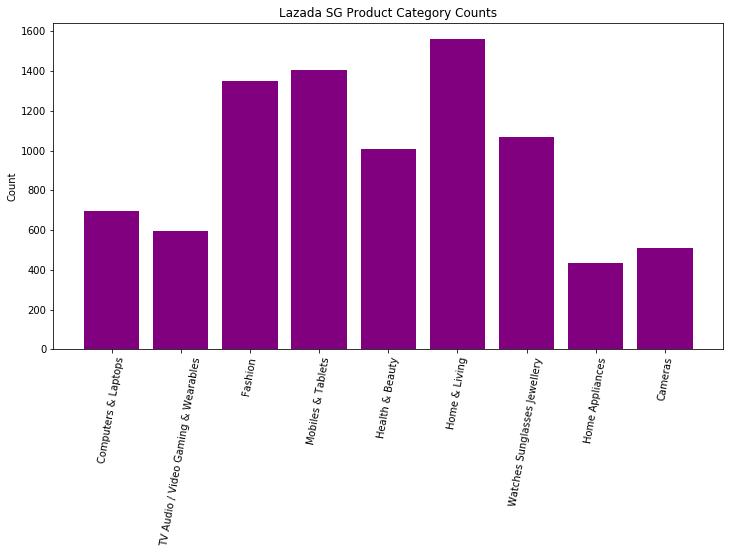

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline


categories = SG_Products.keys()
counts = SG_Products.values()

plt.figure(figsize = (12, 6))   #increase figure size

plt.bar(categories, counts, color='purple')
plt.xticks(rotation = 80)      #rotate x-axis naming

plt.title('Lazada SG Product Category Counts')
plt.ylabel('Count')

plt.show

#### Question 3
Apply what you've learnt from the example for the products from <b>Malaysia</b>.

<function matplotlib.pyplot.show(*args, **kw)>

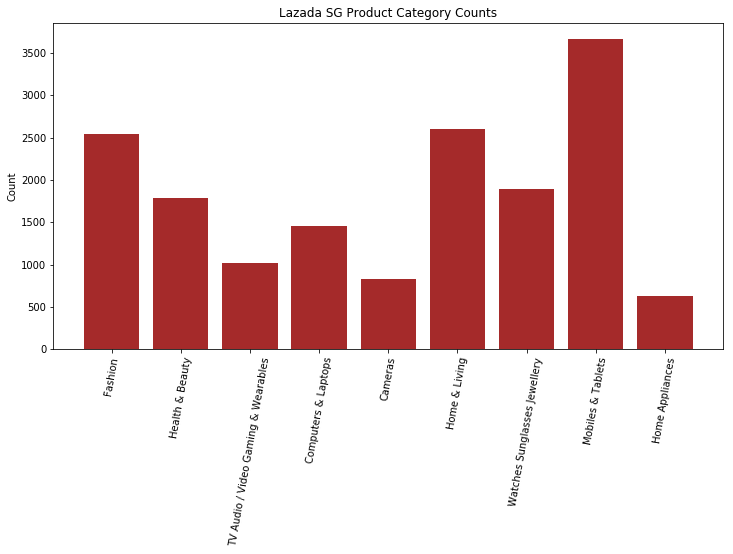

In [55]:
# Your code here:

categories = MY_Products.keys()
counts = MY_Products.values()

plt.figure(figsize = (12, 6))   #increase figure size

plt.bar(categories, counts, color='brown')
plt.xticks(rotation = 80)      #rotate x-axis naming

plt.title('Lazada SG Product Category Counts')
plt.ylabel('Count')

plt.show


#### Question 4
Apply what you've learnt from the example for the products from <b>Phillippines</b>.

<function matplotlib.pyplot.show(*args, **kw)>

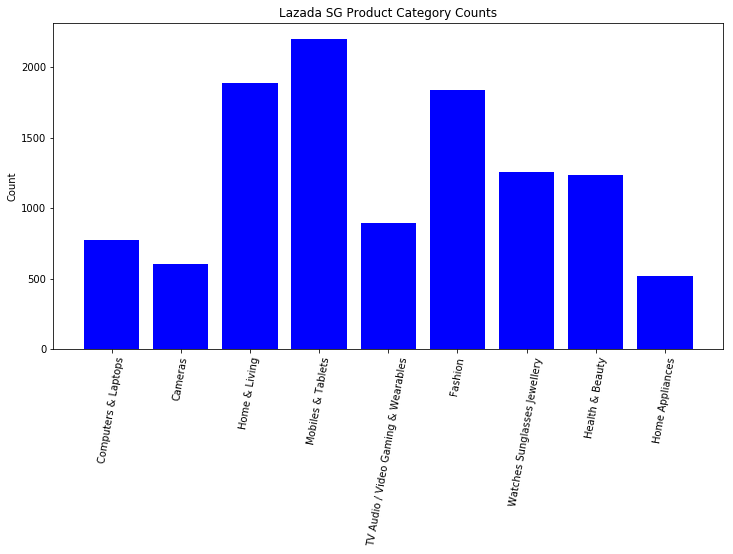

In [56]:
# Your code here:

categories = PH_Products.keys()
counts = PH_Products.values()

plt.figure(figsize = (12, 6))   #increase figure size

plt.bar(categories, counts, color='blue')
plt.xticks(rotation = 80)      #rotate x-axis naming

plt.title('Lazada SG Product Category Counts')
plt.ylabel('Count')

plt.show


<hr>

### WordCloud
WordCloud are one of the more interesting ways to show texts data, it shows the most commonly occuring word in the dataset as the biggest and so on.

<p>Now, let's create a wordcloud to show the different products which are offered</p>

Tip: If the wordcloud doesn't run properly for you, try going to the following link to look for solutions. This wordcloud library is inherently unstable, hence its common for it to not work on certain platforms. Link: https://stackoverflow.com/questions/41409570/cant-install-wordcloud-in-python-anaconda

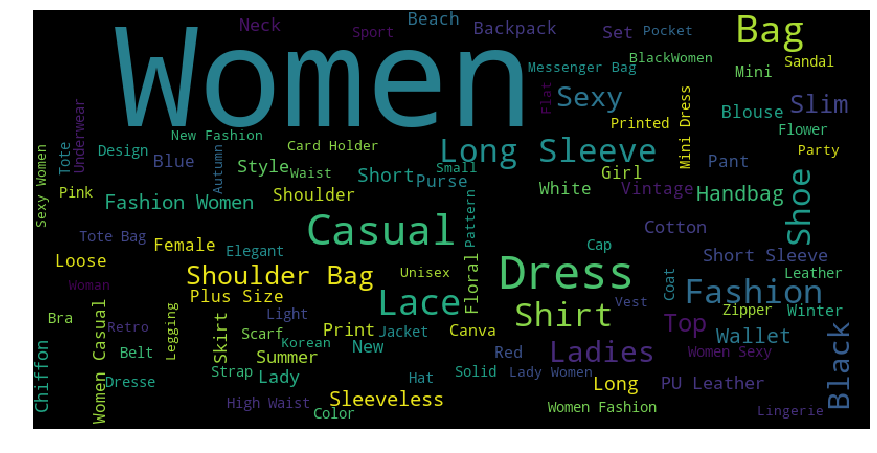

In [58]:
!pip install WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

women_titles = ''
men_titles = ''

# This iterates through all the lazada data and create a very long string of the product titles
for product in lazada_data:
    
    if product['category_lvl_1']=='Fashion':
        
        if product['category_lvl_2']=='Women':
            women_titles += product['title']
        
        elif product['category_lvl_2']=='Men':
            men_titles += product['title']
        

from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,8))

women_title_wordcloud = WordCloud(
    width=800, 
    height=400,
    max_words=100,
    relative_scaling=1).generate(women_titles)

plt.imshow(women_title_wordcloud)
plt.axis("off")
plt.show()

#### Applying WordCloud to `Men` products

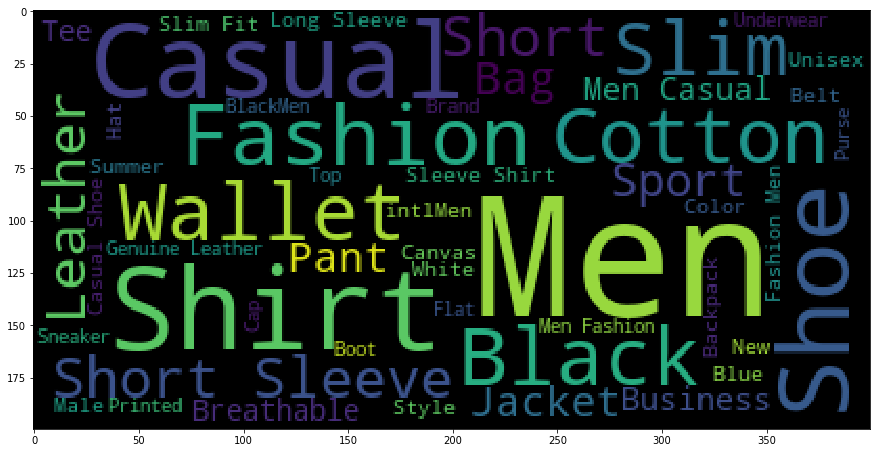

In [59]:
# Your code here:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

string = ''

for row in lazada_data:
    category_1 = row['category_lvl_1']
    category_2 = row['category_lvl_2']
    title = row['title']
    
    if category_1 == 'Fashion' and category_2 == 'Men':
        string += title

plt.figure(figsize=(15,8))

wc = WordCloud(max_words=50).generate(string)

plt.imshow(wc)


<hr>

### References

### <center> Important Collections Functions </center>
### <center> Creation </center>
|Collection Type | Function | Examples |
| ---------|---------|---------|
| `list` | <center>None</center>| `new_list = []` <br><br> `new_list = [1,2,3,4]` |
| `dict` | <center>None</center>| `new_dict = {}` <br><br> `new_dict = {'a': 1, 'b':2}`|

### <center> Add / Appending Data </center>
|Collection Type | Functions | Examples | Resulting Output|
| ---------|---------|---------| ------ |
| `list` | <center>`.append()`</center>| `new_list = [1,2,3]` <br><br> `new_list.append(4)` | `[1,2,3,4]`|
| `list` | <center>`.extend()`</center>| `new_list = [1,2]` <br><br> `new_list.extend([3,4])` | `[1,2,3,4]`|
| `dict` | <center>None</center>| `new_dict = {}` <br><br> `new_dict['a'] = 1` <br><br> `new_dict['b'] = 2` | `{'a': 1, 'b':2}`|

### <center> Updating / Changing Data </center>
|Collection Type | Functions | Examples | Resulting Output|
| ---------|---------|---------| ------ |
| `list` | <center>None</center>| `new_list = [1,2,3]` <br><br> `new_list[0] = 5` | `[5,2,3]`|
| `dict` | <center>None</center>| `new_dict = {'a': 1, 'b':2}` <br><br> `new_dict['a'] = 10`| `{'a': 10, 'b':2}`|

### <center> Accessing / Taking Out Data </center>
|Collection Type | Functions | x to be| Examples |
| ---------|---------|---------| ------ |
| `list` | <center>None</center>| 3 |`new_list = [1,2,3]` <br><br> `x = new_list[2] `|
| `list of list` | <center>None</center>|3 |`new_list = [[1,2],[3,4]]` <br><br> `x = new_list[1][0] `|
| `list of dict` | <center>None</center>| 2 |`new_list = [{'a':1},{'b':2}]` <br><br> `x = new_list[1]['b'] `|
| `dict` | <center>None</center>| 2|`new_dict = {'a': 1, 'b':2}` <br><br> `x = new_dict['b']`|